In [8]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt

import data_making as dm
%reload_ext autoreload
%autoreload 2

In [14]:
root = r"F:\RawReconstructions"
exp_names = ["osmoseflom_torrskan kjerne D 05b", "Angola_OC9_S19", "Berea04b", "TR_outcrop_sample", "Vuggy"]
phan_names = [f"phantom_{str(i).zfill(5)}" for i in range(1,12)]
o_root = r"F:\ReconstructionDatasets"
o_name = "other_dataset_factor12"

In [15]:
# recs = [dm.EquinorReconstructions(root, name, o_root, o_name) for name in exp_names]
# recs = [dm.TomoBankPhantomCT(root,name,o_root, o_name, geo = dm.MicroGeometry() ) for name in phan_names]
other_recs = [dm.TomoBankPhantomCT(root,name,o_root, o_name, geo = dm.MicroGeometry() ) for name in phan_names]

In [16]:
other_recs[0].process_data(other_recs,n_angles=12, undersampling_factor=True)

In [11]:
recs[0].process_data(recs, n_angles=16,undersampling_factor=True )

In [20]:
recs[0].copy_from_other(other_recs[0])

100%|██████████| 11/11 [01:17<00:00,  7.07s/it]


In [23]:
print(recs[0].__len__())

22


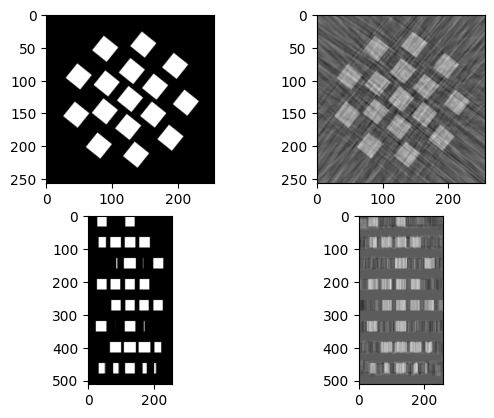

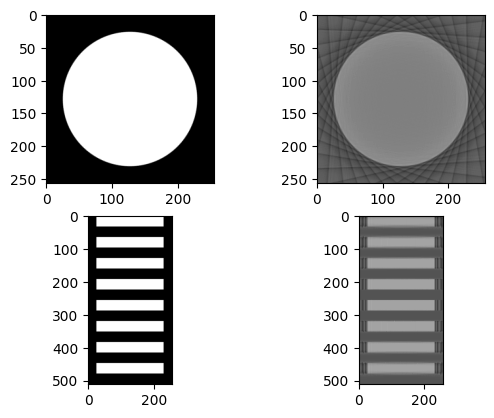

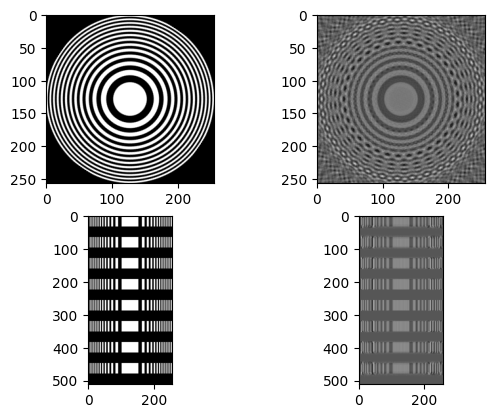

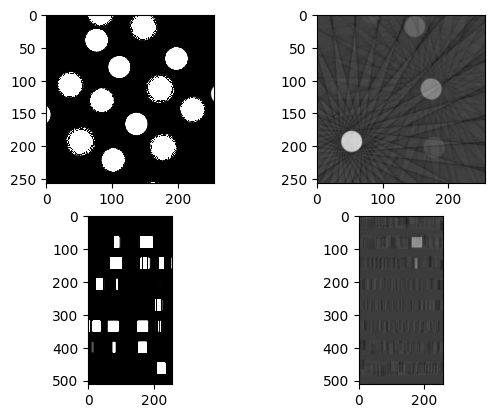

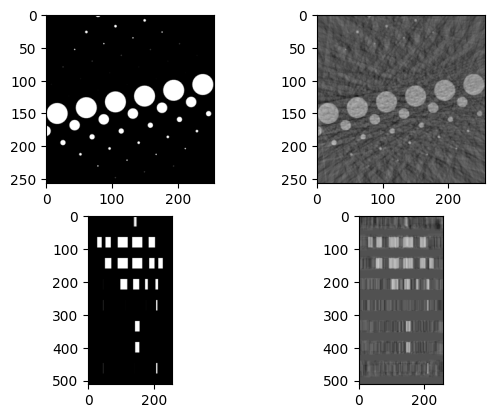

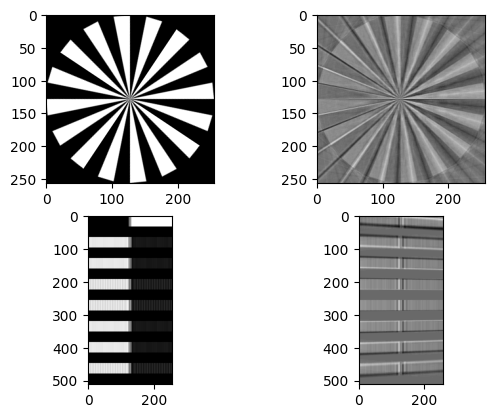

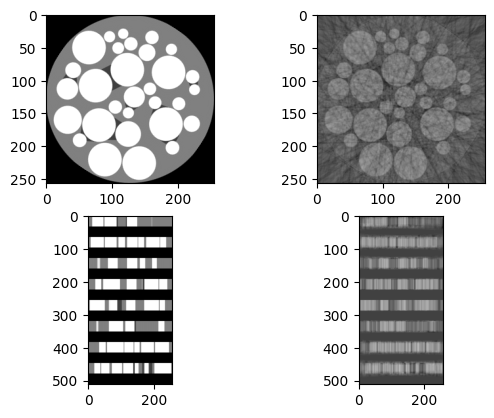

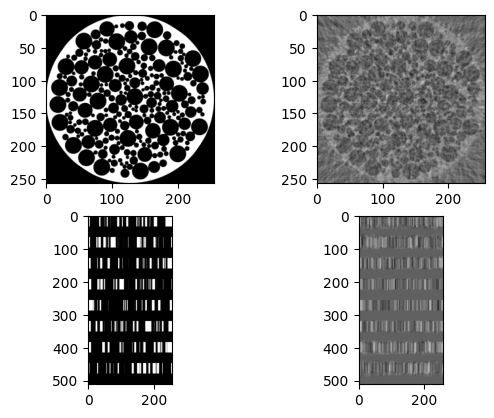

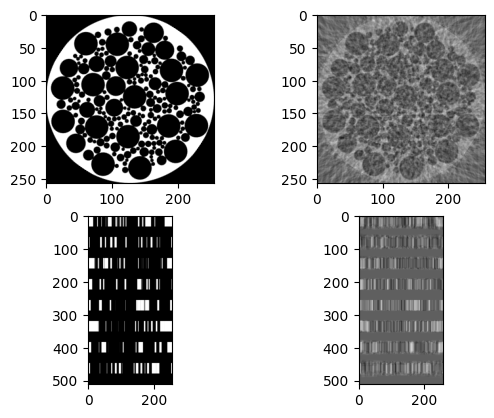

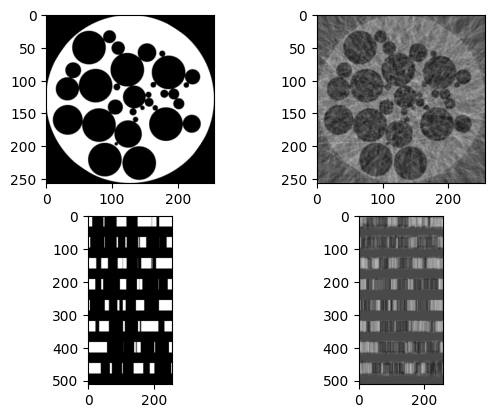

In [17]:
import h5py
import matplotlib.pyplot as plt

for i in range(10):

    with h5py.File(os.path.join(o_root, f"{o_name}.h5"), "r") as f:
        data_cross = np.array(f["target3D"][f"{str(i).zfill(5)}"][128,:,:])
        under_data_cross = np.array(f["noisy3D"][f"{str(i).zfill(5)}"][128,:,:])

        data_proj = np.array(f["target3D"][f"{str(i).zfill(5)}"][:,128,:])
        under_data_proj = np.array(f["noisy3D"][f"{str(i).zfill(5)}"][:,128,:])

    fig, ax = fig, ax = plt.subplots(2,2)
    ax= ax.reshape(-1)
    ax[0].imshow(data_cross, cmap="gray", vmin=0, vmax=1)
    ax[1].imshow(under_data_cross, cmap="gray", vmin=0, vmax=1)
    ax[2].imshow(data_proj, cmap="gray", vmin=0, vmax=1)
    ax[3].imshow(under_data_proj, cmap="gray", vmin=0, vmax=1)
    plt.show()

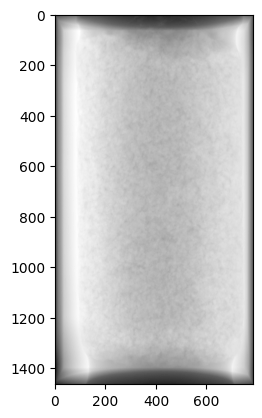

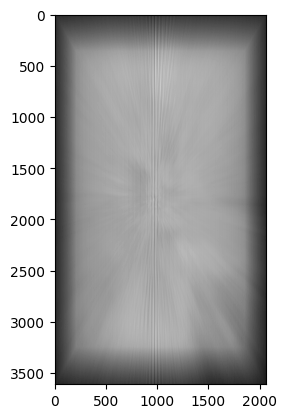

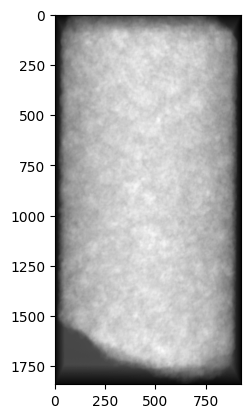

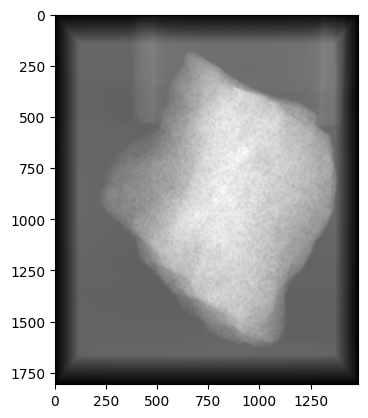

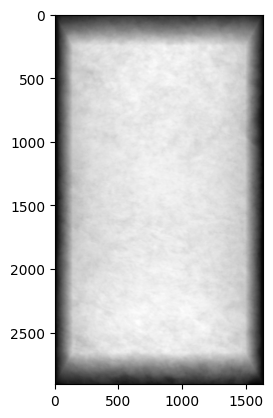

In [4]:
# recs[0].process_data(recs, n_angles=51)

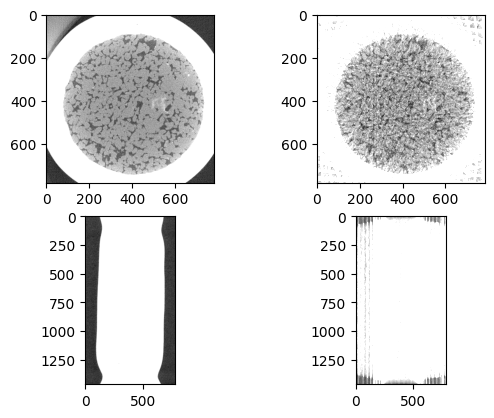

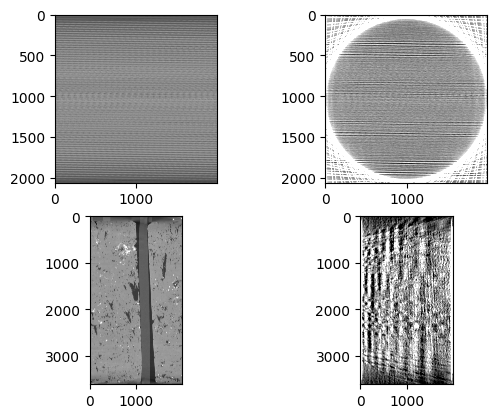

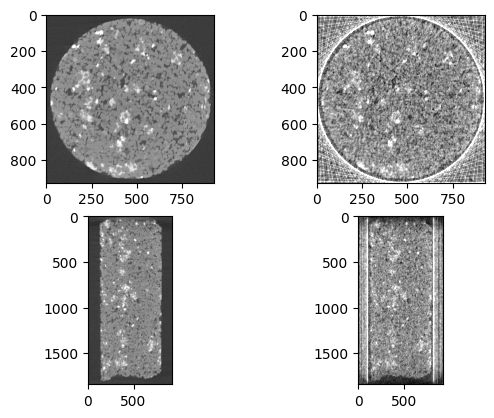

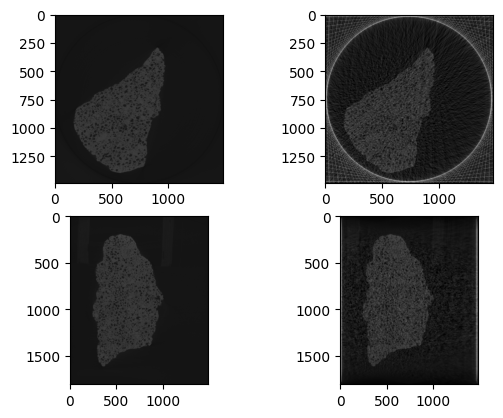

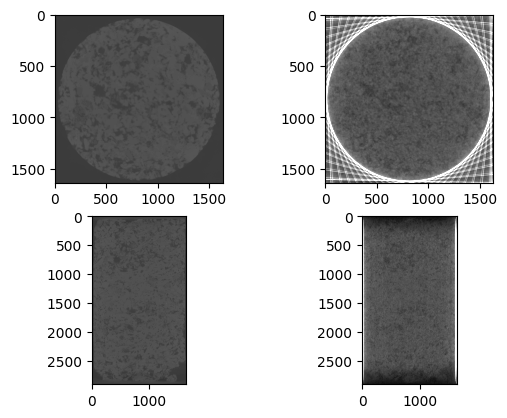

In [8]:
import h5py
import matplotlib.pyplot as plt

for i in range(5):

    with h5py.File(os.path.join(o_root, f"{o_name}.h5"), "r") as f:
        data_cross = np.array(f["target3D"][f"{str(i).zfill(5)}"][750,:,:])
        under_data_cross = np.array(f["noisy3D"][f"{str(i).zfill(5)}"][750,:,:])

        data_proj = np.array(f["target3D"][f"{str(i).zfill(5)}"][:,750,:])
        under_data_proj = np.array(f["noisy3D"][f"{str(i).zfill(5)}"][:,750,:])

    fig, ax = fig, ax = plt.subplots(2,2)
    ax= ax.reshape(-1)
    ax[0].imshow(data_cross, cmap="gray", vmin=0, vmax=1)
    ax[1].imshow(under_data_cross, cmap="gray", vmin=0, vmax=1)
    ax[2].imshow(data_proj, cmap="gray", vmin=0, vmax=1)
    ax[3].imshow(under_data_proj, cmap="gray", vmin=0, vmax=1)
    plt.show()